In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/rathu/Desktop/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data["expenses"].max()

63770.43

In [7]:
data["expenses"].min()

1121.87

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [9]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

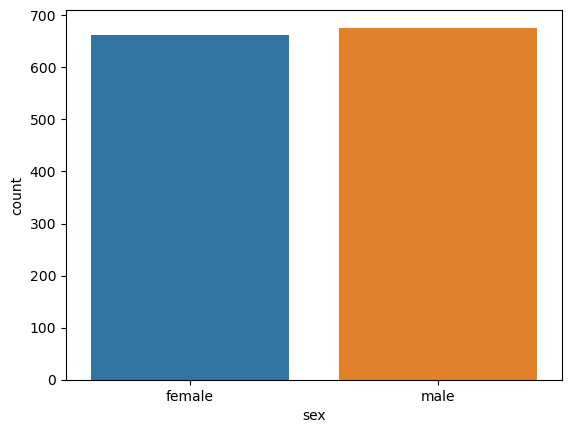

In [15]:
sns.countplot(x="sex", data=data)

In [13]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

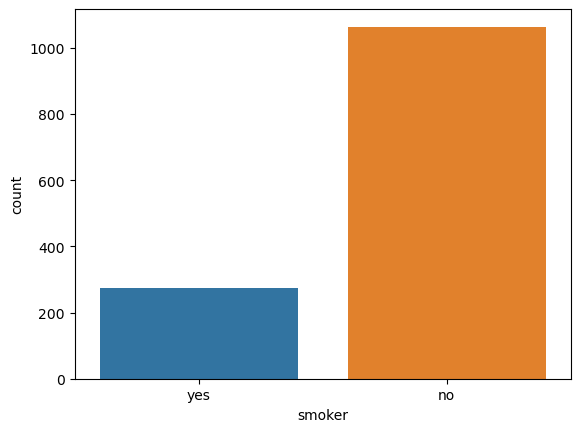

In [16]:
sns.countplot(x="smoker", data=data)

In [17]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='region', ylabel='count'>

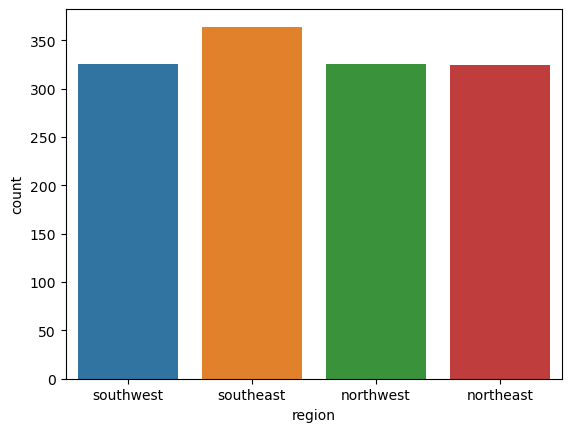

In [18]:
sns.countplot(x="region", data=data)

In [19]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

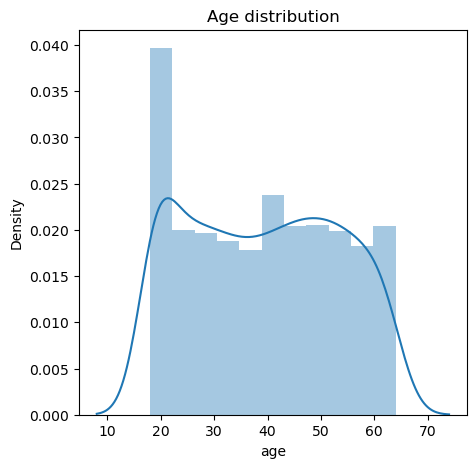

In [30]:
# age distribution
plt.figure(figsize=(5,5))
sns.distplot(data["age"])
plt.title("Age distribution")
plt.show()

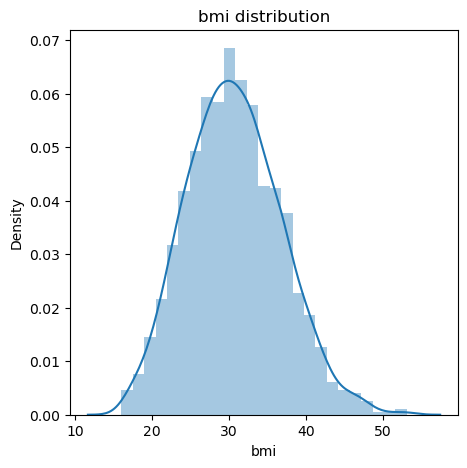

In [29]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.distplot(data["bmi"])
plt.title("bmi distribution")
plt.show()

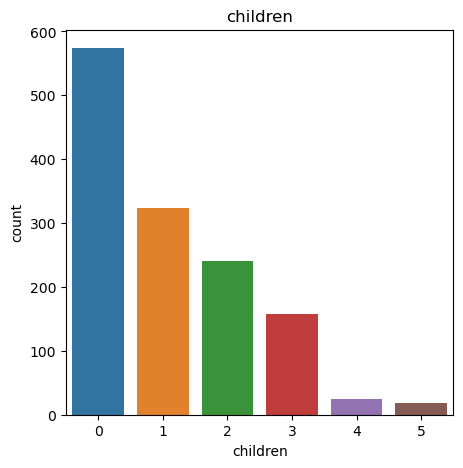

In [28]:
# children 
plt.figure(figsize=(5,5))
sns.countplot(x="children", data=data)
plt.title("children")
plt.show()

In [26]:
data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

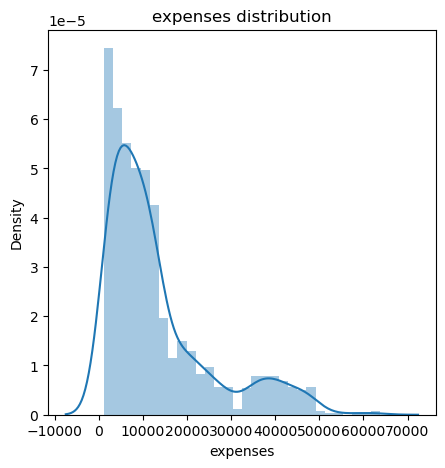

In [27]:
# expenses distribution
plt.figure(figsize=(5,5))
sns.distplot(data["expenses"])
plt.title("expenses distribution")
plt.show()

In [31]:
data.corr

<bound method DataFrame.corr of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

<Axes: >

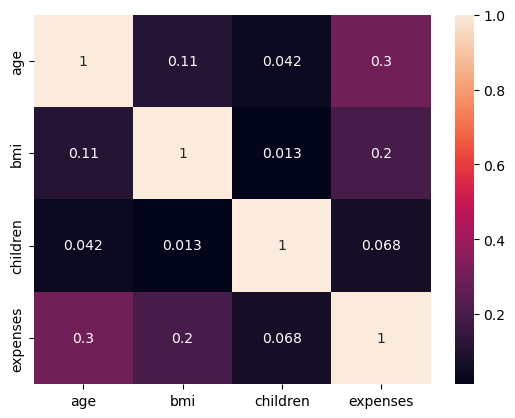

In [32]:
sns.heatmap(data.corr(),annot=True)

In [37]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)



In [38]:
x=data.drop(["expenses"],axis=1)
y=data.expenses

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [41]:
x_train.shape,y_train.shape

((1070, 6), (1070,))

In [42]:
x_test.shape,y_test.shape

((268, 6), (268,))

In [43]:
# List to store models
models = []

# Linear Regression Pipeline
linear_regression_pipe = Pipeline(steps=[
    ("linear_regression", LinearRegression())
])
models.append(("Linear Regression", linear_regression_pipe))

# Decision Tree Regression Pipeline
decision_tree_pipe = Pipeline(steps=[
    ("decision_tree", DecisionTreeRegressor())
])
models.append(("Decision Tree", decision_tree_pipe))

# Gradient Boosting Regression Pipeline
gradient_boosting_pipe = Pipeline(steps=[
    ("gradient_boosting", GradientBoostingRegressor())
])
models.append(("Gradient Boosting", gradient_boosting_pipe))

# Random Forest Regression Pipeline
random_forest_pipe = Pipeline(steps=[
    ("random_forest", RandomForestRegressor())
])
models.append(("Random Forest", random_forest_pipe))

In [45]:
def score(act, pred):
    r2score = r2_score(act, pred)
    mse = mean_squared_error(act, pred)
    rmse = np.sqrt(mse)
    return r2score, mse, rmse

results = []
names = []
rmse_score = []
mse_score = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    (r2score, mse, rmse) = score(y_test, y_pred)
    results.append(r2score)                      
    names.append(name)
    mse_score.append(mse)
    rmse_score.append(rmse)
    print("{}: R2 Score: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}".format(name, r2score, rmse, mse))


Linear Regression: R2 Score: 0.7990, RMSE: 5655.2705, MSE: 31982084.9070
Decision Tree: R2 Score: 0.6772, RMSE: 7167.0288, MSE: 51366301.7902
Gradient Boosting: R2 Score: 0.8960, RMSE: 4068.2502, MSE: 16550659.4001
Random Forest: R2 Score: 0.8826, RMSE: 4322.4924, MSE: 18683940.4546


In [46]:
gb_reg = Pipeline(steps=[
    ("gradient_boosting", GradientBoostingRegressor())])

In [47]:
gb_reg.fit(x_train,y_train)

Pipeline(steps=[('gradient_boosting', GradientBoostingRegressor())])

In [48]:
y_pred=gb_reg.predict(x_test)

In [49]:
(r2score,mse,rmse)=score(y_test,y_pred)
print(f"r2score:{r2score}\nmse:{mse}\nrmse:{rmse}")

r2score:0.8955578968911733
mse:16619867.99844192
rmse:4076.7472325914346


From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
sex,1338.0,0.494768,0.500160,0.00,0.0000,0.00,1.000,1.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
smoker,1338.0,0.795217,0.403694,0.00,1.0000,1.00,1.000,1.00
region,1338.0,1.455904,1.130888,0.00,0.0000,1.00,2.000,3.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [52]:
minmax=data.describe()

minmax.loc[["min","max"]].to_json("schema.json")